# Research Question(s):
How does having children affect one's time? How does having children affect the distribution of work/play in a relationship?

The following is a short exploration of Americans' time use, using data from the American Time Use Survey, administered annually by the US Bureau of Labor Statistics.

### Useful links:

Activity codes lexicons: http://www.bls.gov/tus/lexiconnoex2013.pdf

Frequently used variables: http://www.bls.gov/tus/freqvariables.pdf

In [1]:
import pandas as pd
import re
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

atus_data = pd.read_csv("~/travis_python/homework/atus-analysis/atusdata/atussum_2013.dat")

### Renaming and categorizing data

In [2]:
atus_data.rename(columns={'TRYHHCHILD':'Youngest_child', 'TEAGE':'Age', 'TESEX':'Sex', 'PEEDUCA':'Education', 'PTDTRACE':'Race', 'GTMETSTA':'Metro_status', 'TELFS':'Labor_status', 'TRERNWA':'Wkly_earnings'}, inplace=True)
atus_data.head()

,tucaseid,TUFINLWGT,Youngest_child,Age,Sex,Education,Race,PEHSPNON,Metro_status,Labor_status,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
columns = atus_data.columns.values
sleep = []
for heading in columns:
    if "t0101" in heading:
        sleep.append(atus_data[heading])
non_sleep_personal = []
for heading in columns:
    if ("t01" in heading) and not ("t0101" in heading):
        non_sleep_personal.append(atus_data[heading])
HH_activities = []
for heading in columns:
    if "t02" in heading:
        HH_activities.append(atus_data[heading])
HH_help = []
for heading in columns:
    if "t03" in heading:
        HH_help.append(atus_data[heading])
non_HH_help = []
for heading in columns:
    if "t04" in heading:
        non_HH_help.append(atus_data[heading])
Work = []
for heading in columns:
    if "t05" in heading:
        Work.append(atus_data[heading])
Education = []
for heading in columns:
    if "t06" in heading:
        Education.append(atus_data[heading])
Purchases = []
for heading in columns:
    if "t07" in heading:
        Purchases.append(atus_data[heading])
Services = []
for heading in columns:
    if "t08" in heading:
        Services.append(atus_data[heading])
HH_Services = []
for heading in columns:
    if "t09" in heading:
        HH_Services.append(atus_data[heading])
Gov_Civic = []
for heading in columns:
    if "t10" in heading:
        Gov_Civic.append(atus_data[heading]) 
Eat_Drink = []
for heading in columns:
    if "t11" in heading:
        Eat_Drink.append(atus_data[heading])
Social_leisure = []
for heading in columns:
    if "t12" in heading:
        Social_leisure.append(atus_data[heading])
Sports = []
for heading in columns:
    if "t13" in heading:
        Sports.append(atus_data[heading])
Religion = []
for heading in columns:
    if "t14" in heading:
        Religion.append(atus_data[heading])
Volunteer = []
for heading in columns:
    if "t15" in heading:
        Volunteer.append(atus_data[heading])
Phone = []
for heading in columns:
    if "t16" in heading:
        Phone.append(atus_data[heading])
Travel = []
for heading in columns:
    if "t18" in heading:
        Travel.append(atus_data[heading])

In [4]:
atus_data["Sleep"] = sum(sleep)
atus_data["Non_Sleep_Personal"] = sum(non_sleep_personal)
atus_data["HH_activities"] = sum(HH_activities)
atus_data["HH_help"] = sum(HH_help)
atus_data["non_HH_help"] = sum(non_HH_help)
atus_data["Work"] = sum(Work)
atus_data["Education"] = sum(Education)
atus_data["Purchases"] = sum(Purchases)
atus_data["Services"] = sum(Services)
atus_data["HH_Services"] = sum(HH_Services)
atus_data["Gov_Civic"] = sum(Gov_Civic)
atus_data["Eat_Drink"] = sum(Eat_Drink)
atus_data["Social_leisure"] = sum(Social_leisure)
atus_data["Sports"] = sum(Sports)
atus_data["Religion"] = sum(Religion)
atus_data["Volunteer"] = sum(Volunteer)
atus_data["Phone"] = sum(Phone)
atus_data["Travel"] = sum(Travel)
atus_data.head()

,tucaseid,TUFINLWGT,Youngest_child,Age,Sex,Education,Race,PEHSPNON,Metro_status,Labor_status,...,Services,HH_Services,Gov_Civic,Eat_Drink,Social_leisure,Sports,Religion,Volunteer,Phone,Travel
0,20130101130004,11899905.662034,12,22,2,455,8,2,1,5,...,0,0,0,35,330,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,0,1,2,1,1,...,0,0,0,75,160,0,0,0,0,20
2,20130101130123,10377056.507734,-1,47,2,0,1,2,1,4,...,0,0,0,170,80,260,0,0,0,65
3,20130101130611,7731257.992805,-1,50,2,0,1,1,1,1,...,0,0,0,70,125,0,0,0,0,75
4,20130101130616,4725269.227067,-1,45,2,510,2,2,1,1,...,0,0,0,120,90,60,0,0,0,0


In [5]:
cat_data = atus_data[["tucaseid", "TUFINLWGT", "Youngest_child", "Age", "Sex", "Education", "Labor_status", "Wkly_earnings", "Sleep", "Non_Sleep_Personal", "HH_activities", "HH_help", "non_HH_help", "Work", "Education", "Purchases", "Services", "HH_Services", "Gov_Civic", "Eat_Drink", "Social_leisure", "Sports", "Religion", "Volunteer", "Phone", "Travel"]]

In [ ]:
telfs = pd.Series({1: "Employed - at work",
                   2: "Employed - absent",
                   3: "Unemployed - laid off",
                   4: "Unemployed - looking",
                   5: "Not in labor force"})

In [28]:
women = cat_data.groupby(['Sex']).get_group((2))
men = cat_data.groupby(['Sex']).get_group((1))
#print(women.head())

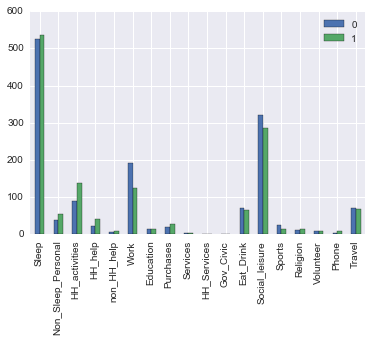

In [29]:
menave = pd.Series(men.mean(axis=0))
womenave = pd.Series(women.mean(axis=0))

sexave = pd.concat([menave, womenave], axis=1, ignore_index=True)[8:]
sexave.plot(kind="bar")

## Roster File

In [6]:
atus_resp = pd.read_csv("~/travis_python/homework/atus-analysis/atusdata/atusresp_2013.dat")
atus_resp.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [7]:
atus_resp.rename(columns={'TRSPPRES': "domestic_partner", "TRHHCHILD": "children", "TEHRUSLT": "work_hours"}, inplace=True)


In [8]:
dom_partner = pd.Series({1: "Spouse",
                   2: "Unmarried Partner",
                   3: "Single"})
atus_resp.domestic_partner = atus_resp.domestic_partner.map(dom_partner)

kids = pd.Series({1: "Children", 2: "No Children"})
atus_resp.children = atus_resp.children.map(kids)


In [9]:
short_resp = atus_resp[['TUCASEID', 'domestic_partner', 'children', 'work_hours']]
short_resp.head()

,TUCASEID,domestic_partner,children,work_hours
0,20130101130004,Single,Children,-1
1,20130101130112,Spouse,Children,40
2,20130101130123,Spouse,No Children,-1
3,20130101130611,Single,No Children,-4
4,20130101130616,Single,No Children,21


NOTE: for work_hours, "-4" means "hours vary"

## Combining Roster and summary data

#### A few notes about the data used here.

Age is restricted to those under 55 years old. The ATUS asks whether respondents have children under the age of 18 in the household, so a significant number of the "no children" respondents may have children over 18. Focusing on respondents aged 20-55 allows this study to focus on adults in their prime working/childrearing ages.

The main dependent variables are time spent on sleep, non-sleep personal time, household activities, work, social/leisure time, and travel. These were chosen because they are broad categories for which most every recipient provided data. Additionally, they are the largest categories of time use for average Americans, reflecting work, chores, fun, and rest.

Labor status, weekly earnings, and work hours may be used for further analysis later to answer questions such as: how does having children affect the work hours for men or women? Are there class-based differences in time use?

In [11]:
df = pd.merge(cat_data, short_resp, how="outer", left_on="tucaseid", right_on="TUCASEID")
df = df[['tucaseid', 'TUFINLWGT', 'Age', 'Sex', 'domestic_partner', 'children', 
         'Labor_status', 'Wkly_earnings', 'work_hours', 'Sleep', 'Non_Sleep_Personal', 
         'HH_activities', 'Work', 'Social_leisure', 'Travel']]
df.head()

,tucaseid,TUFINLWGT,Age,Sex,domestic_partner,children,Labor_status,Wkly_earnings,work_hours,Sleep,Non_Sleep_Personal,HH_activities,Work,Social_leisure,Travel
0,20130101130004,11899905.662034,22,2,Single,Children,5,-1,-1,540,20,0,0,330,0
1,20130101130112,4447638.009513,39,1,Spouse,Children,1,173076,40,580,35,111,0,160,20
2,20130101130123,10377056.507734,47,2,Spouse,No Children,4,-1,-1,450,90,295,0,80,65
3,20130101130611,7731257.992805,50,2,Single,No Children,1,86538,-4,450,30,0,680,125,75
4,20130101130616,4725269.227067,45,2,Single,No Children,1,23000,21,570,0,90,0,90,0


In [14]:
df.describe()

,tucaseid,TUFINLWGT,Age,Labor_status,Wkly_earnings,work_hours,Sleep,Non_Sleep_Personal,HH_activities,Work,Social_leisure,Travel
count,1.138500e+04,1.138500e+04,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000,11385.000000
mean,2.013064e+13,8.008868e+06,48.279842,2.571805,49534.988669,21.985683,531.140799,47.744313,116.879139,155.032587,301.972596,69.373562
std,3.517214e+08,7.185242e+06,17.909707,1.891551,68103.111687,22.663148,135.308386,61.311278,137.327289,238.046772,216.482582,76.710103
min,2.013010e+13,6.881577e+05,15.000000,1.000000,-1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.013030e+13,3.409968e+06,34.000000,1.000000,-1.000000,-1.000000,450.000000,15.000000,10.000000,0.000000,135.000000,20.000000
50%,2.013061e+13,5.943161e+06,48.000000,1.000000,16000.000000,24.000000,525.000000,36.000000,65.000000,0.000000,260.000000,50.000000
75%,2.013091e+13,9.897958e+06,62.000000,5.000000,80000.000000,40.000000,600.000000,60.000000,180.000000,375.000000,435.000000,95.000000
max,2.013121e+13,1.125620e+08,85.000000,5.000000,288461.000000,120.000000,1413.000000,1105.000000,1365.000000,1350.000000,1439.000000,1088.000000


In [34]:
women = df.Sex == "Female"
men = df.Sex == "Male"
working_age = df.Age < 55
children = df.children == "Children"
no_children = df.children == "No Children"
not_in_labor_force = df.Labor_status == 5
employed = df.Labor_status < 3
single = df.domestic_partner == "Single"
coupled = df.domestic_partner != "Single"
full_time = df.work_hours >= 30
part_time = df.work_hours < 30

In [35]:
def average_minutes(data, activity_code):
    activity_col = "{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [36]:
wa_men = df[men & working_age]
wa_women = df[women & working_age]
men_children = df[men & working_age & children]
men_no_child = df[men & working_age & no_children]
women_children = df[women & working_age & children]
women_no_child = df[women & working_age & no_children]
men_single = df[men & working_age & single]
men_couple = df[men & working_age & coupled]
women_single = df[women & working_age & single]
women_couple = df[women & working_age & coupled]
men_single_children = df[men & working_age & children & single]
men_single_no_child = df[men & working_age & no_children & single]
men_couple_children = df[men & working_age & children & coupled]
men_couple_no_child = df[men & working_age & no_children & coupled]
women_single_children = df[women & working_age & children & single]
women_single_no_child = df[women & working_age & no_children & single]
women_couple_children = df[women & working_age & children & coupled]
women_couple_no_child = df[women & working_age & no_children & coupled]


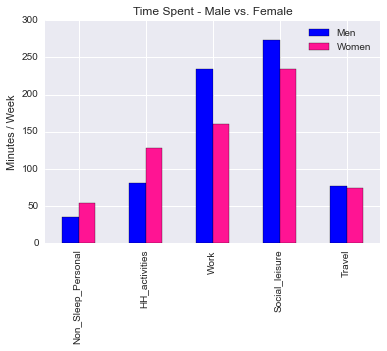

In [37]:
menave = pd.Series(wa_men.mean(axis=0))
womenave = pd.Series(wa_women.mean(axis=0))

sexave = pd.concat([menave, womenave], axis=1, ignore_index=True)[7:]
sexave.plot(kind="bar", color=("blue", "deeppink"))
plt.legend(("Men", "Women"))
plt.title("Time Spent - Male vs. Female")
plt.ylabel("Minutes / Week")
plt.figure(figsize=(60,30))
plt.show()

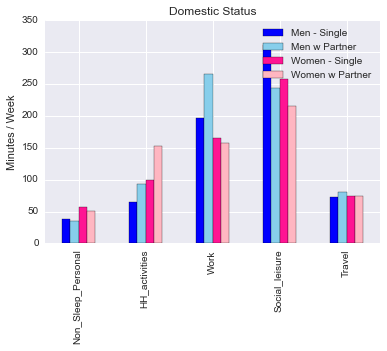

In [43]:
men_single_ave = pd.Series(men_single.mean(axis=0))
men_couple_ave = pd.Series(men_couple.mean(axis=0))
women_single_ave = pd.Series(women_single.mean(axis=0))
women_couple_ave = pd.Series(women_couple.mean(axis=0))

coupled_ave = pd.concat([men_single_ave, men_couple_ave, women_single_ave, women_couple_ave], axis=1, ignore_index=True)[7:]
coupled_ave.plot(kind="bar", color=("blue", "skyblue", "deeppink", "lightpink"))
plt.legend(("Men - Single", "Men w Partner", "Women - Single", "Women w Partner"))
plt.title("Domestic Status")
plt.ylabel("Minutes / Week")
plt.show()

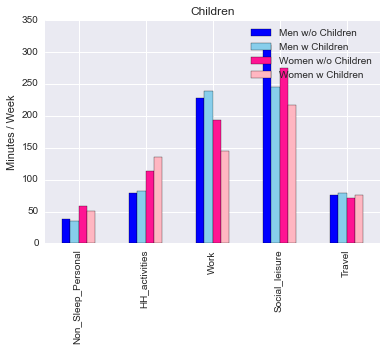

In [42]:
men_children_ave = pd.Series(men_children.mean(axis=0))
men_no_child_ave = pd.Series(men_no_child.mean(axis=0))
women_children_ave = pd.Series(women_children.mean(axis=0))
women_no_child_ave = pd.Series(women_no_child.mean(axis=0))

children_ave = pd.concat([men_no_child_ave, men_children_ave, women_no_child_ave, women_children_ave], axis=1, ignore_index=True)[7:]
children_ave.plot(kind="bar", color=("blue", "skyblue", "deeppink", "lightpink"))
plt.legend(("Men w/o Children", "Men w Children", "Women w/o Children", "Women w Children"))
plt.title("Children")
plt.ylabel("Minutes / Week")
plt.show()


In [40]:
men_couple_children_ave = pd.Series(men_couple_no_child.mean(axis=0))
men_couple_no_child_ave = pd.Series(men_couple_children.mean(axis=0))
women_couple_children_ave = pd.Series(women_couple_no_child.mean(axis=0))
women_couple_no_child_ave = pd.Series(women_couple_children.mean(axis=0))


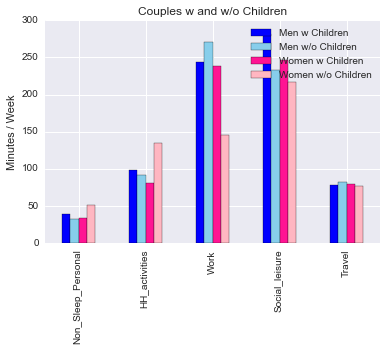

In [44]:
children_ave = pd.concat([men_couple_children_ave, men_couple_no_child_ave, men_children_ave, women_children_ave], axis=1, ignore_index=True)[7:]
children_ave.plot(kind="bar", color=("blue", "skyblue", "deeppink", "lightpink"))
plt.legend(("Men w Children", "Men w/o Children", "Women w Children", "Women w/o Children"))
plt.title("Couples w and w/o Children")
plt.ylabel("Minutes / Week")
plt.show()
